In [1]:
#importamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
from datetime import datetime, timedelta
from scipy.stats import zscore

#cambiamos la carpeta de trabajo y cargamos los archivos
data_folder = r'D:\datos_GPetersii\datos_GPetersii\Fish1\Object\raw' #cambiar a ruta con archivos .bin
os.chdir(data_folder)

files_vid = sorted(glob.glob('*.h5'))
files_EOD = sorted(glob.glob('*.bin'))
#definimos parametros
sf = 10000

In [2]:
#cargamos el archivo de FB-DOE
with open('fish1_FB-DOE.pkl', 'rb') as file:   #cambiar al nombre apropiado de archivo
        FB_doe = pickle.load(file)

files_start = [datetime.strptime(key[:-1], '%Y-%m-%dT%H_%M_%S') for key in sorted(FB_doe['FB-DOE'].keys())]

In [3]:
#inicializamos las listas
EOD_zscore = {}
EOD_freq = FB_doe['FB-DOE']
EOD_t = FB_doe['Peak-time']
std = {}
t = []

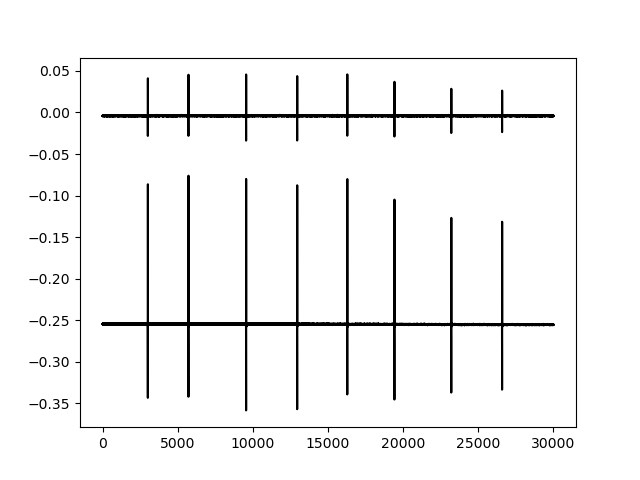

In [32]:
%matplotlib widget
EOD = np.fromfile(files_EOD[1],dtype=np.float64)
EOD_ch = EOD.reshape((int(EOD.shape[0]/3), 3 ))
fig, ax = plt.subplots()
plt.plot(EOD_ch[10000:40000, 0],  c='k')
plt.plot([x- .2 for x in EOD_ch[10000:40000, 1]],  c='k')
plt.show()
fig.savefig('example_recording.svg', format='svg')

In [40]:
for i,key in enumerate(sorted(EOD_freq.keys()), start=1):
    freq = EOD_freq[key]
    peak = EOD_t[key]
    EOD_zscore[key] = zscore(freq)
    std[key] = np.std(freq)

    ##creamos el vector t en totalseconds del dia
    midnight = files_start[i-1].replace(hour=0, minute=0, second=0, microsecond=0) #definimos la media noche para el dia donde se registro ese archivo
    start = abs(midnight - files_start[i-1]).total_seconds() # calculamos el tiempo de inicio del archivo en segundos totales respecto de las 00 para poder compararla
    EOD = np.fromfile(files_EOD[i-1],dtype=np.int16)
    time_EOD = np.linspace(start=start, stop=start+20*60, num=len(EOD))
    del EOD
    t.append(time_EOD)


In [41]:
cv = {}
for key, value in std.items():
    cv[key] = value/np.mean(EOD_freq[key])
    

In [42]:
cv_list = []
for key, value in cv.items():
    cv_list.append(value)

lab = [files_start[x] for x in np.arange(0,55,10)]

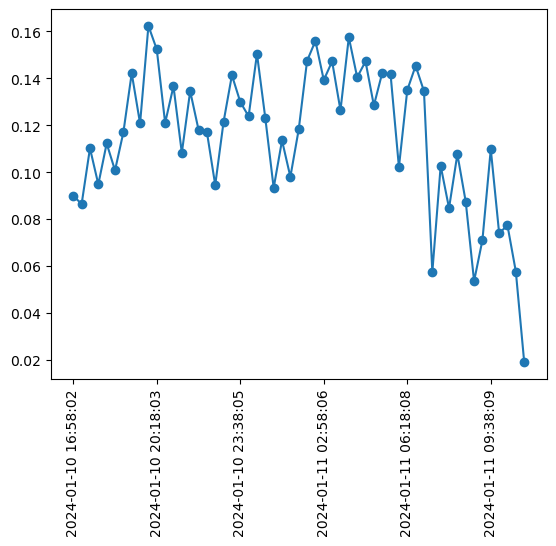

In [43]:
plt.figure()
plt.plot(cv_list)
plt.scatter(range(len(cv_list)), cv_list)
plt.xticks(ticks=np.arange(0,55,10),labels=lab, rotation=90)
plt.show()

In [27]:
len(files_start)

55